**1. Data Exploration and Preprocessing**

In [ ]:
#Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
#Category Distribution
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


In [ ]:
#Missing Values
df.isnull().sum()

,0
Data,0
Labels,0


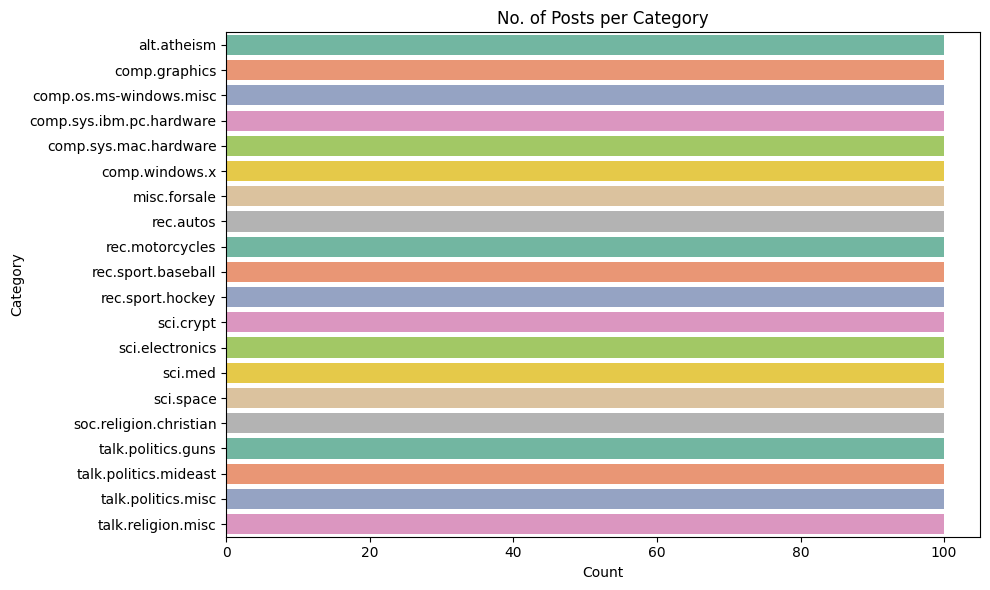

In [ ]:
#Visualise Category Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Labels', data=df, palette='Set2', order=df['Labels'].value_counts().index)
plt.title('No. of Posts per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [ ]:
#Preprocessing the blog text
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Data'] = df['Data'].apply(clean_text)
print("\nSample cleaned text:")
print(df[['Data', 'Cleaned_Data']].head())


Sample cleaned text:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [ ]:
#Feature Extraction with TF-IDF
tfid = TfidfVectorizer(max_features=5000)
X = tfid.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

**2. Naive Bayes Model for Text Classification**

In [ ]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Model
nb_model = MultinomialNB()

#Train the model
nb_model.fit(X_train, y_train)

#Predict on the test set
y_pred = nb_model.predict(X_test)

#Check Model Performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8425

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.95      0.93        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0

**3. Sentiment Analysis**

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)
print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [ ]:
#Count of sentiment per category
sentiment_dist = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_dist)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


**4. Evaluation**

**1.   Discussion : Naive Bayes Classifier Performance**


*   **rec.autos, rec.motorcycles, rec.sport.hockey, sci.crypt, soc.religion.christian :** Achieved F1-scores between 0.94 and 0.97, reflecting very high precision and recall.

*  **comp.sys.mac.hardware, comp.windows.x, sci.space :** Also showed strong performance with balanced precision/recall above 0.90.

* **comp.graphics, comp.sys.ibm.pc.hardware, talk.politics.misc:** F1-scores in the range of 0.80-0.86.

* **alt.atheism:** Precision=0.50, F1 = 0.62 -> Over-prediction likely.

* **talk.religion.misc:** Recall = 0.21, F1 = 0.31 -> Model struggles to detect this category.


**2. Challenges Observed**

* **Class imbalance:** Some categories have few samples, leading to poor recall.

*  **Semantic overlap:** Categories like **talk.politics.** share similar vocabulary, confusing the model.


**3. Sentiment Analysis Reflections**

* Categories such as **rec.autos, rec,motorcycles and sci.space** tend to have neutral or factual tone.

* Categories like **talk.politics. and alt.atheism** often carry strong opinions, influencing both classification performance and sentiment scores.


